#  Supervised Learning - Linear Models with 1-variable #

## Model Representation ##

%%latex
<img src="../pictures/notation.png" alt="notation" width="800" height="800" />


Ως $x^{(i)}$ ορίζουμε τις μεταβλητές εισόδου, που ονομάζονται και χαρακτηριστικά (features), και ως $y^{(i)}$ ορίζουμε τις μεταβλητές εξόδου, που ονομάζονται και μεταβλητές στόχοι (target), και τις οποίες προσπαθούμε να προβλέψουμε. Ένα ζευγάρι $(x^{(i)}$,$y^{(i)})$ ονομάζεται παράδειγμα εκπαίδευσης (training example), ενώ μια λίστα από $m$ παραδείγματα εκπαίδευσης $(x^{(i)}$,$y^{(i)})$; $i = 1,...,m$ ονομάζεται σύνολο εκπαίδευσης.


<img src="../pictures/learning_process.png" alt="learning_process" width="800" height="800" />

Για να περιγράψουμε τυπικά το πρόβλημα της μάθησης με επίβλεψη, στόχος είναι, ένα σύστημα να μάθει μια συνάρτηση $h: {X} -> y$ έτσι ώστε $h(x)$ να είναι μια καλή πρόβλεψη της αντίστοιχης τιμής $y$. Η συνάρτηση αυτή καλείται συνάρτηση υπόθεσης. 


## Linear Regression ##

### Representation ###

In linear regression, we represent the hypothesis, $h$, as follows:

$$h_{\theta}(x) = \theta_{0} + \theta_{1}x_1 + \theta_{2} x_2 + \dots  +  \theta_{n} x_n$$

$\theta_0$ is called **bias** and $\theta_1,\theta_2,\dots,\theta_n$ are called feature weights

### Evaluation ###

A loss function $L(h_{\theta}(x),y)$ measures the difference between the value of the output variable $y$ of a training example ($x,y$) and the output of the hypothesis given $x$, $h_{\theta}(x)$

A cost function iterates over the training corpus $(x^{(i)},y^{(i)})$, $i=1...m$ and measures the average loss between the ground truth $y^{(i)}$ and the output of the hypothesis $h_{\theta}(x^{(i)})$


We evaluate linear regression hypotheses using the (half of) the mean squared error cost function: 

$$J(\theta_0,\dots,\theta_n) = \dfrac{1}{2m}\sum_{i=1}^m[h_\theta(x^{(i)}) - y^{(i)}]^2 $$

### Graphical Representation

The following plot represents training examples scattered across the plane $x-y$. 

<img src="../pictures/cost_function_1.png" alt="notation" width="500" height="500" />

We try to find a straight line, which is defined by $h_{\theta}(x) = \theta_0 + \theta_1x $, and will cross along all the points.

The best straight line is the one where **mean squarred error** from all the examples (points) and the line will be minimum. Ideally, this line should go through all the data points. In such case $J(\theta_0,\theta_1) = 0$. The following figure displays the ideal case where the cost functions is equally to 0. 

<img src="../pictures/cost_function_2.png" alt="notation" width="500" height="500" />

The cost is computed like this: 

$$J(\theta_1) = \dfrac{1}{2m}\sum^m_{i=1}(h_{\theta}(x^{(i)})-y^{(i)})^2 = \dfrac{1}{2m}\sum^m_{i=1}(\theta_i x^{(i)}-y^{(i)})^2 = \dfrac{1}{2m}(0^2 + 0^2 + 0^2) = 0$$


In case where the $\theta_1=0.5$, which the line's slope (κλίση), the vertical distance between the data points and the line is increased. The result is displayed in the following image:

<img src="../pictures/cost_function_3_brushed.png" alt="notation" width="500" height="500" />

The cost is alson increased:
$$J(\theta_1) = J(0.5) = \dfrac{1}{2m}((0.5-1)^2 + (1-2)^2 + (1.5-3)^2) = \dfrac{1}{2\cdot3}(3.5) \approx0.58$$


Different values for $\theta$ give different costs as depicted in the following figure:

<img src="../pictures/cost_function_4.png" alt="notation" width="500" height="500" />


The goal of linear regression is to **minimize the cost function**. In this case $\theta_1=1$ is a global minimum. 


## Gradient Descent ##

So we have our hypothesis function $h(x)$ and we have a way of measuring how well it fits into the data. Now we need to estimate the parameters in the hypothesis function. That's where **gradient descent** comes in.

We have a function $J(\theta_0,\theta_1)$ and we want the minimum min$J(\theta_0,\theta_1)$. We start with some $\theta_0$ & $\theta_1$. We start let's say with $\theta_0=0$ and $\theta_1=0$ and we constantly changing until we hopefully reach a minimum. 

Imagine that we graph our hypothesis function based on its fields $\theta_0$ & $\theta_1$ (actually we are graphing the cost function as a function of the parameter estimates). We are not graphing $x$ and $y$ itself, but the parameter range of our hypothesis function and the cost resulting from selecting a particular set of parameters.

We put $\theta_0$ on the $x$ axis and $\theta_1$ on the $y$ axis, with the cost function on the vertical $z$ axis. The points on our graph will be the result of the cost function using our hypothesis with those specific theta parameters. The graph below depicts such a setup.

![](../pictures/gradient_1.png)

We will know that we have succeeded when our cost function is at the very bottom of the pits in our graph, i.e. when its value is the minimum. The red arrows show the minimum points in the graph.

The way we do this is by taking the derivative (the tangential line to a function) of our cost function. The slope of the tangent is the derivative at that point and it will give us a direction to move towards. We make steps down the cost function in the direction with the steepest descent. The size of each step is determined by the parameter $\alpha$, which is called the **learning rate**. 

For example, the distance between each 'star' in the graph above represents a step determined by our parameter $\alpha$. A smaller $\alpha$ would result in a smaller step and a larger $\alpha$ results in a larger step. The direction in which the step is taken is determined by the partial derivative of $J(\theta_0,\theta_1)$. Depending on where one starts on the graph, one could end up at different points. The image above shows us two different starting points that end up in two different places.


Repeat until convergence:
$$\theta_j := \theta_j -  \alpha \dfrac{\partial}{\partial\theta_j}J(\theta_0,\theta_1)$$

where $j=0,1$ represents the $j$th feature. In each iteration, parameters $\theta_0,\theta_1,\dots,\theta_n$ should be computed at the same time. Computing a parameter before another one will lead to errors.


When specifically applied to the case of linear regression, a new form of the gradient descent equation can be derived. We can substitute our actual cost function and our actual hypothesis function and modify the equation to:


$$\theta_0 :=  \theta_0 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m}(h_\theta(x_{i}) - y_{i}) $$

$$ \theta_1 :=  \theta_1 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m}\left((h_\theta(x_{i}) - y_{i}) x_{i}\right)$$


where $m$ is the training data size, $\theta_0$ is a constant that will change along the parameters $\theta_1$, and $x_i,y_i$ are the values of the training dataset. 

Note that we have separated out the two cases for $\theta_j$ into separate equations for $\theta_0$ and $\theta_1$ and that for $\theta_1$ we are multiplying $x_{i}$ at the end due to the derivative. The following is a derivation of $\frac{\partial}{\partial \theta_j}J(\theta)$:

\begin{equation}
\begin{split}
\dfrac{\partial}{\partial\theta_j}J(\theta) & = \dfrac{\partial}{\partial\theta_j}J(\theta)\frac{1}{2}(h_\theta(x)-y)^2 \\
& = 2\cdot\frac{1}{2}(h_\theta(x)-y)\cdot\dfrac{\partial}{\partial\theta_j}(h_\theta(x)-y) \\
& =(h_\theta(x)-y)\cdot\dfrac{\partial}{\partial\theta_j}\left(\sum_{i=0}^n\theta_ix_i-y\right) \\
& =(h_\theta(x)-y)x_j
\end{split}
\end{equation}


So, this is simply gradient descent on the original cost function $J$. This method looks at every example in the entire training set on every step, and is called **batch gradient descent**. Note that, while gradient descent can be susceptible to local minima in general, the optimization problem we have posed here for linear regression has only one global, and no other local, optima; thus gradient descent always converges (assuming the learning rate α is not too large) to the global minimum. Indeed, $J$ is a convex quadratic function. Here is an example of gradient descent as it is run to minimize a quadratic function.

![](../pictures/gradient_4.png)

The ellipses shown above are the contours of a quadratic function. Also shown is the trajectory taken by gradient descent, which was initialized at (48,30). The x’s in the figure (joined by straight lines) mark the successive values of θ that gradient descent went through as it converged to its minimum.


**On a side note, we should adjust our parameter $\alpha$ to ensure that the gradient descent algorithm converges in a reasonable time. Failure to converge or too much time to obtain the minimum value imply that our step size is wrong.**





### Learning Rate 

The parameter $\alpha$, the learning rate, affects the time needed for the gradient descent to converge. Inability to converge or huge time to converge ussually means that the alpha parameter is wrong.

The following images depict two cases of wrong learning rate. In the first case the learning rate $\alpha$ is very small that leads the to many algorithm repitions which will take very long time to converge. In the second image, the learning rate $\alpha$ is very big and the algorithm can't converge.


<img src="../pictures/learning_rate1.png" alt="notation" width="500" height="500" />


<img src="../pictures/learning_rate2.png" alt="notation" width="500" height="500" />

**Check Stohastic Gradient Descent & Mini-Batch**

## Example of Linear Regression ##

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


#### Learn more on [diabetes dataset](https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset) ####

In [4]:
# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]
print(diabetes_X)

[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]
 [-0.04069594]
 [-0.04716281]
 [-0.00189471]
 [ 0.06169621]
 [ 0.03906215]
 [-0.08380842]
 [ 0.01750591]
 [-0.02884001]
 [-0.00189471]
 [-0.02560657]
 [-0.01806189]
 [ 0.04229559]
 [ 0.01211685]
 [-0.0105172 ]
 [-0.01806189]
 [-0.05686312]
 [-0.02237314]
 [-0.00405033]
 [ 0.06061839]
 [ 0.03582872]
 [-0.01267283]
 [-0.07734155]
 [ 0.05954058]
 [-0.02129532]
 [-0.00620595]
 [ 0.04445121]
 [-0.06548562]
 [ 0.12528712]
 [-0.05039625]
 [-0.06332999]
 [-0.03099563]
 [ 0.02289497]
 [ 0.01103904]
 [ 0.07139652]
 [ 0.01427248]
 [-0.00836158]
 [-0.06764124]
 [-0.0105172 ]
 [-0.02345095]
 [ 0.06816308]
 [-0.03530688]
 [-0.01159501]
 [-0.0730303 ]
 [-0.04177375]
 [ 0.01427248]
 [-0.00728377]
 [ 0.0164281 ]
 [-0.00943939]
 [-0.01590626]
 [ 0.0250506 ]
 [-0.04931844]
 [ 0.04121778]
 [-0.06332999]
 [-0.06440781]
 [-0.02560657]
 [-0.00405033]
 [ 0.00457217]
 [-0.00728377]
 [-0.0374625 ]
 [-0.02560657]
 [-0.02452876]
 [-0.01806

In [5]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
# print(diabetes_X_train)
# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]
print(diabetes_y_test)


[233.  91. 111. 152. 120.  67. 310.  94. 183.  66. 173.  72.  49.  64.
  48. 178. 104. 132. 220.  57.]


In [6]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)
print(diabetes_y_test)
print(diabetes_y_pred)



[233.  91. 111. 152. 120.  67. 310.  94. 183.  66. 173.  72.  49.  64.
  48. 178. 104. 132. 220.  57.]
[225.9732401  115.74763374 163.27610621 114.73638965 120.80385422
 158.21988574 236.08568105 121.81509832  99.56772822 123.83758651
 204.73711411  96.53399594 154.17490936 130.91629517  83.3878227
 171.36605897 137.99500384 137.99500384 189.56845268  84.3990668 ]


In [7]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


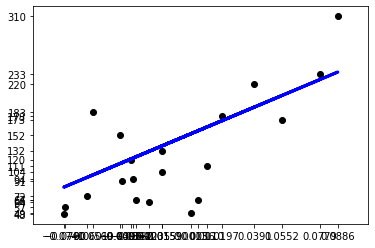

In [8]:
# Plot outputs
plt.scatter(diabetes_X_test[:,:1], diabetes_y_test,  color='black')
plt.plot(diabetes_X_test[:,:1], diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(diabetes_X_test)
plt.yticks(diabetes_y_test)

plt.show()